> [!NOTE]
> This package qiskit.pulse is depricated in favour of qiskit_dynamics
>
> The functions `qiskit.scheduler.utils.format_meas_map()`, `qiskit.scheduler.utils.measure()`, and `qiskit.scheduler.utils.measure_all()` had been moved to `qiskit.pulse.utils.format_meas_map()`, `qiskit.pulse.macros.measure()`, and `qiskit.pulse.macros.measure_all()` respectively. The previous location was deprecated in Qiskit 0.20.0 (Terra 0.15.0, released on 2020-08-10) and it is no longer supported.

- **schedulers**: instructions which control the electronic components of the quantum sys.
- **pulses** a signal which actually manuplate the qubits on the quantum sys. Aka the pulse is tuned for specific qubit so that that only gets manipulated. it is created by Arbitary waveform Generator(AWG) wherein the `𝑓`, `ϕ` are set by `SetFrquency`, `ShiftPhase` respectively

In [46]:
from tokenize import group

from qiskit.pulse import DriveChannel, Play, Schedule, Waveform
from qiskit.pulse.macros import measure_all

In essence, the Acquire instruction performs the following steps:

    Applies a measurement signal to the specified channel for the given duration.
    Acquires the raw data from the channel.
    Processes the raw data using the specified kernel.
    Classifies the processed data into a classical bit (0 or 1) using the discriminator.
    Stores the raw data in the mem_slot and the classified result in the reg_slot.

In Pulses
pre-installed waveforms available are Constant, Drag, discrete, Gaussian, GaussianSquare, Waveform, ...

In [47]:
import numpy as np

In [48]:
x = np.linspace(start=0, stop=2*np.pi, num=64)

In [49]:
x

array([0.        , 0.0997331 , 0.1994662 , 0.2991993 , 0.3989324 ,
       0.4986655 , 0.5983986 , 0.6981317 , 0.7978648 , 0.8975979 ,
       0.997331  , 1.0970641 , 1.1967972 , 1.2965303 , 1.3962634 ,
       1.4959965 , 1.5957296 , 1.6954627 , 1.7951958 , 1.8949289 ,
       1.994662  , 2.0943951 , 2.1941282 , 2.2938613 , 2.3935944 ,
       2.4933275 , 2.5930606 , 2.6927937 , 2.7925268 , 2.8922599 ,
       2.991993  , 3.0917261 , 3.1914592 , 3.2911923 , 3.3909254 ,
       3.4906585 , 3.5903916 , 3.6901247 , 3.7898578 , 3.8895909 ,
       3.989324  , 4.0890571 , 4.1887902 , 4.2885233 , 4.38825641,
       4.48798951, 4.58772261, 4.68745571, 4.78718881, 4.88692191,
       4.98665501, 5.08638811, 5.18612121, 5.28585431, 5.38558741,
       5.48532051, 5.58505361, 5.68478671, 5.78451981, 5.88425291,
       5.98398601, 6.08371911, 6.18345221, 6.28318531])

In [50]:
data = np.sin(x)

In [51]:
data

array([ 0.00000000e+00,  9.95678466e-02,  1.98146143e-01,  2.94755174e-01,
        3.88434796e-01,  4.78253979e-01,  5.63320058e-01,  6.42787610e-01,
        7.15866849e-01,  7.81831482e-01,  8.40025923e-01,  8.89871809e-01,
        9.30873749e-01,  9.62624247e-01,  9.84807753e-01,  9.97203797e-01,
        9.99689182e-01,  9.92239207e-01,  9.74927912e-01,  9.47927346e-01,
        9.11505852e-01,  8.66025404e-01,  8.11938006e-01,  7.49781203e-01,
        6.80172738e-01,  6.03804410e-01,  5.21435203e-01,  4.33883739e-01,
        3.42020143e-01,  2.46757398e-01,  1.49042266e-01,  4.98458857e-02,
       -4.98458857e-02, -1.49042266e-01, -2.46757398e-01, -3.42020143e-01,
       -4.33883739e-01, -5.21435203e-01, -6.03804410e-01, -6.80172738e-01,
       -7.49781203e-01, -8.11938006e-01, -8.66025404e-01, -9.11505852e-01,
       -9.47927346e-01, -9.74927912e-01, -9.92239207e-01, -9.99689182e-01,
       -9.97203797e-01, -9.84807753e-01, -9.62624247e-01, -9.30873749e-01,
       -8.89871809e-01, -

/tmp/ipykernel_19600/3270416086.py:1: DeprecationWarning: The class ``qiskit.pulse.library.waveform.Waveform`` is deprecated as of Qiskit 1.3. It will be removed in Qiskit 2.0. The entire Qiskit Pulse package is being deprecated and will be moved to the Qiskit Dynamics repository: https://github.com/qiskit-community/qiskit-dynamics
  sine_pulse = Waveform(samples=data, name="sine_pulse")


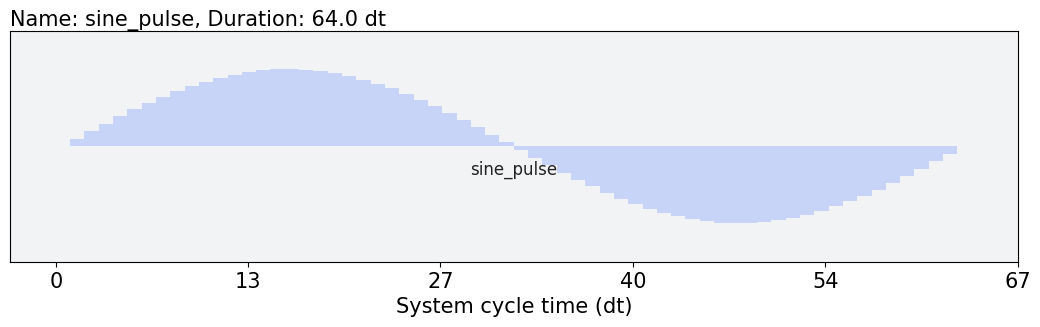

In [52]:
sine_pulse = Waveform(samples=data, name="sine_pulse")
sine_pulse.draw()

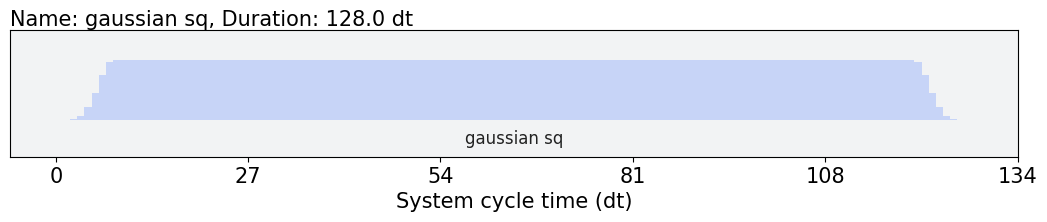

In [53]:
from qiskit.pulse import GaussianSquare
gaussian_sq_pulse = GaussianSquare(duration=128, amp=1, sigma=2, width=112, angle=0.0, name="gaussian sq")
gaussian_sq_pulse.draw(show_waveform_info=True)

2 channels:
- pulse: transmits the generated pulses
  - drive: it transmit pulse to the qubit for exec of gate ops
  - control: (multi-qubit) like Control-Not, Control-Phase, .. provide auxillary control over the qubit over the drive channel
  - measure: it used to send measurement pulse to the qubit for readout from the qubit
- acquisition channel: it recieves pulses from the quantum sys
  - acquire: used to recieve information from the device, collect data from the quantum device

/tmp/ipykernel_19600/81413439.py:1: DeprecationWarning: The class ``qiskit.pulse.schedule.Schedule`` is deprecated as of Qiskit 1.3. It will be removed in Qiskit 2.0. The entire Qiskit Pulse package is being deprecated and will be moved to the Qiskit Dynamics repository: https://github.com/qiskit-community/qiskit-dynamics
  schedule_1 = Schedule(name="schedule 1")
/tmp/ipykernel_19600/81413439.py:2: DeprecationWarning: The class ``qiskit.pulse.channels.Channel`` is deprecated as of Qiskit 1.3. It will be removed in Qiskit 2.0. The entire Qiskit Pulse package is being deprecated and will be moved to the Qiskit Dynamics repository: https://github.com/qiskit-community/qiskit-dynamics
  schedule_1.insert(0, Play(gaussian_sq_pulse, DriveChannel(0)), inplace=True)
/tmp/ipykernel_19600/81413439.py:2: DeprecationWarning: The class ``qiskit.pulse.instructions.play.Play`` is deprecated as of Qiskit 1.3. It will be removed in Qiskit 2.0. The entire Qiskit Pulse package is being deprecated and wil

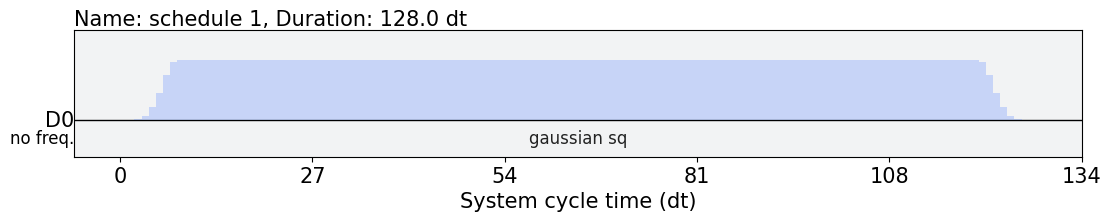

In [54]:
schedule_1 = Schedule(name="schedule 1")
schedule_1.insert(0, Play(gaussian_sq_pulse, DriveChannel(0)), inplace=True)
schedule_1.draw()

/tmp/ipykernel_19600/1015522656.py:1: DeprecationWarning: The class ``qiskit.pulse.schedule.Schedule`` is deprecated as of Qiskit 1.3. It will be removed in Qiskit 2.0. The entire Qiskit Pulse package is being deprecated and will be moved to the Qiskit Dynamics repository: https://github.com/qiskit-community/qiskit-dynamics
  schedule_2 = Schedule(name="schedule 2")
/tmp/ipykernel_19600/1015522656.py:2: DeprecationWarning: The class ``qiskit.pulse.channels.Channel`` is deprecated as of Qiskit 1.3. It will be removed in Qiskit 2.0. The entire Qiskit Pulse package is being deprecated and will be moved to the Qiskit Dynamics repository: https://github.com/qiskit-community/qiskit-dynamics
  schedule_2.insert(0, Play(sine_pulse, DriveChannel(0)), inplace=True)
/tmp/ipykernel_19600/1015522656.py:2: DeprecationWarning: The class ``qiskit.pulse.instructions.play.Play`` is deprecated as of Qiskit 1.3. It will be removed in Qiskit 2.0. The entire Qiskit Pulse package is being deprecated and will

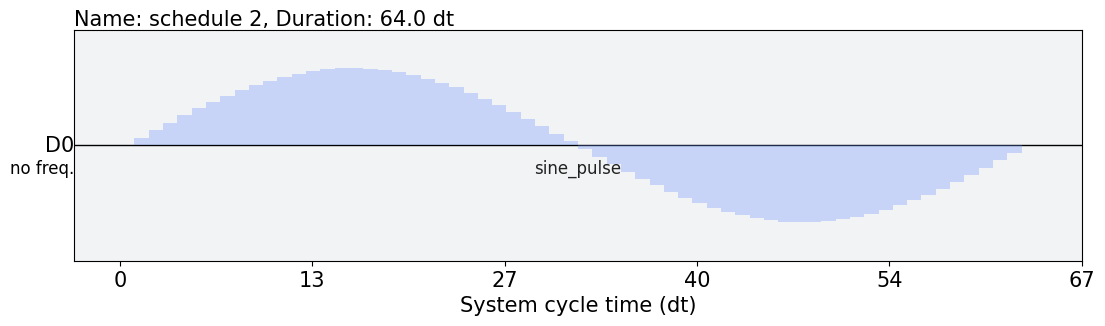

In [55]:
schedule_2 = Schedule(name="schedule 2")
schedule_2.insert(0, Play(sine_pulse, DriveChannel(0)), inplace=True)
schedule_2.draw()

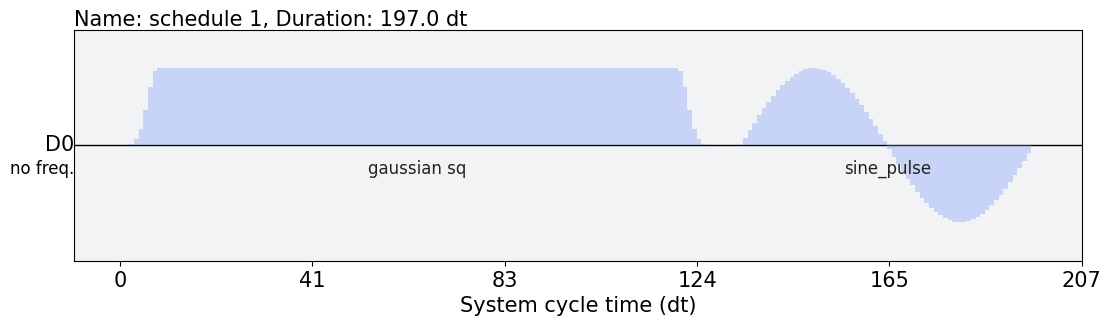

In [56]:
schedule_3 = schedule_1.insert(schedule_1.duration+5, schedule_2) # With a gap!!
schedule_3.draw()

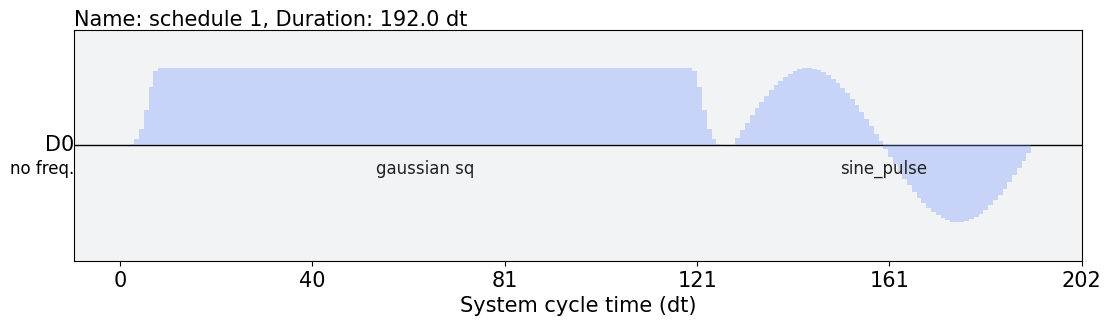

In [57]:
schedule_3_a = schedule_1.append(schedule_2) # Without a gap!!
schedule_3_a.draw()

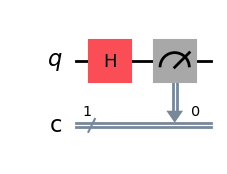

In [58]:
## scheduling existing quantum circuits

from qiskit import QuantumCircuit
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
qc.draw("mpl")

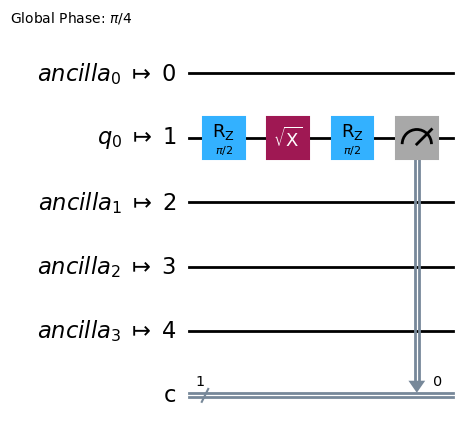

In [59]:
from qiskit import transpile, schedule

from qiskit_ibm_runtime.fake_provider import FakeValenciaV2
backend = FakeValenciaV2()

transpiled_qc = transpile(qc, backend)
transpiled_qc.draw("mpl")

/tmp/ipykernel_19600/3513081877.py:1: DeprecationWarning: The function ``qiskit.compiler.scheduler.schedule()`` is deprecated as of Qiskit 1.3. It will be removed in Qiskit 2.0. The entire Qiskit Pulse package is being deprecated and will be moved to the Qiskit Dynamics repository: https://github.com/qiskit-community/qiskit-dynamics. Note that ``qiskit.compiler.scheduler.schedule()`` will be moved as well.
  circuit_schedule = schedule(transpiled_qc, backend)


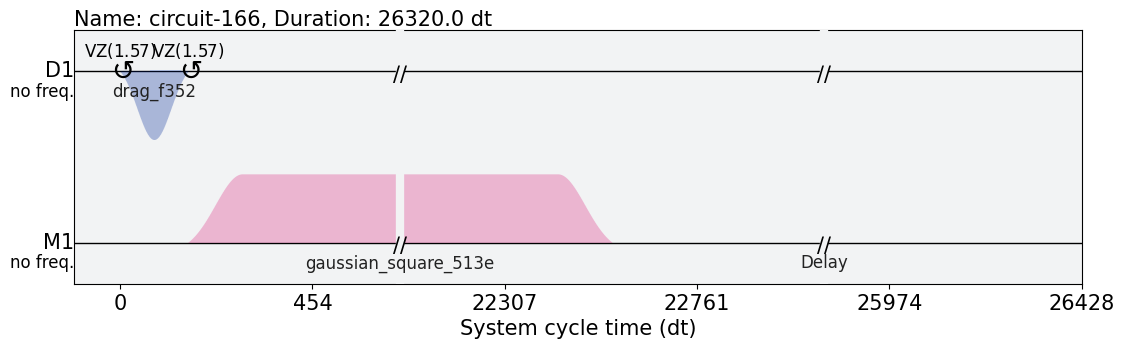

In [60]:
circuit_schedule = schedule(transpiled_qc, backend)
circuit_schedule.draw()

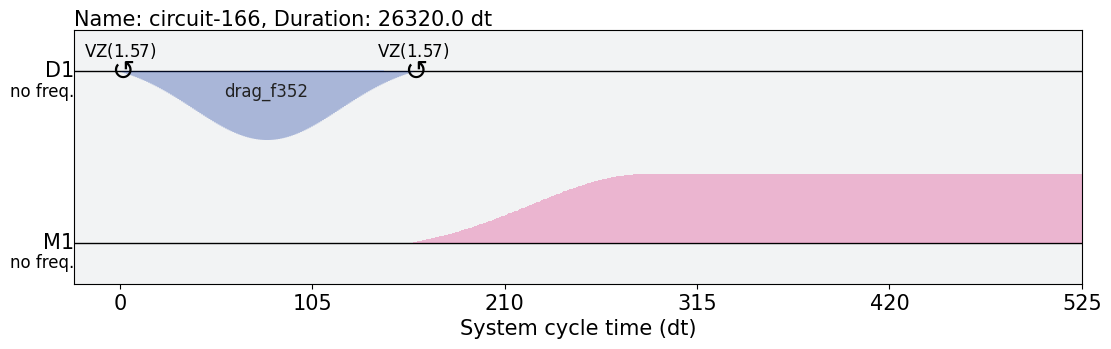

In [61]:
circuit_schedule.draw(time_range=[0, 500])

In [62]:
qc2 = QuantumCircuit(2,2)
qc2.h(0)
qc2.cx(0,1)
qc2.measure([0,1], [0,1])
qc2.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [63]:
from qiskit_ibm_runtime.fake_provider import FakeValenciaV2
backend_2 = FakeValenciaV2()

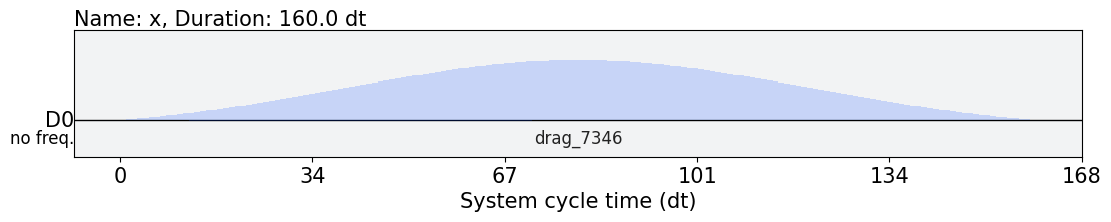

In [64]:
backend_2.defaults().instruction_schedule_map.get('x', qubits=[0]).draw()

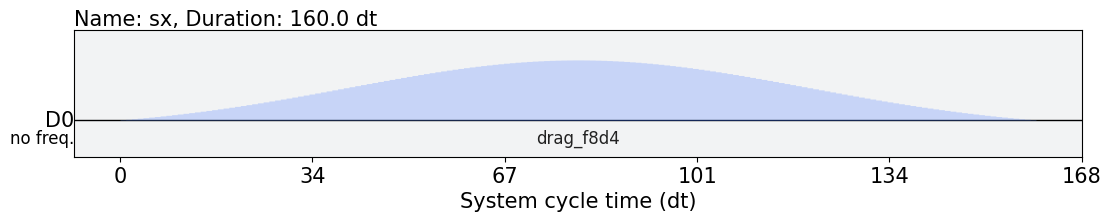

In [65]:
backend_2.defaults().instruction_schedule_map.get('sx', qubits=[0]).draw()

In [66]:
assert backend_2.configuration().open_pulse, "Backend  doesn't support pulse"

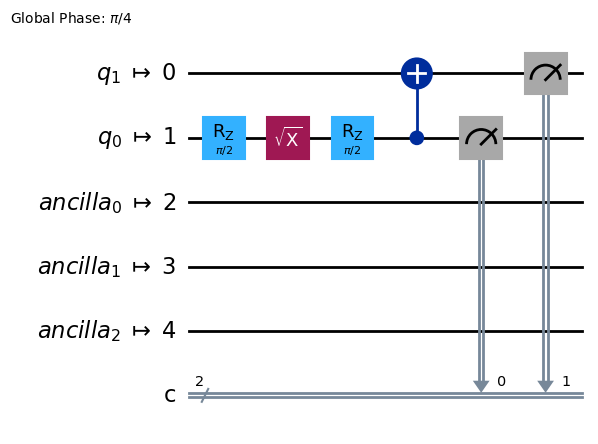

In [67]:
transpiled_qc_2 = transpile(qc2, backend_2)
transpiled_qc_2.draw("mpl")

/tmp/ipykernel_19600/1889594404.py:1: DeprecationWarning: The function ``qiskit.compiler.scheduler.schedule()`` is deprecated as of Qiskit 1.3. It will be removed in Qiskit 2.0. The entire Qiskit Pulse package is being deprecated and will be moved to the Qiskit Dynamics repository: https://github.com/qiskit-community/qiskit-dynamics. Note that ``qiskit.compiler.scheduler.schedule()`` will be moved as well.
  circuit_scheduler2 = schedule(transpiled_qc_2, backend_2)


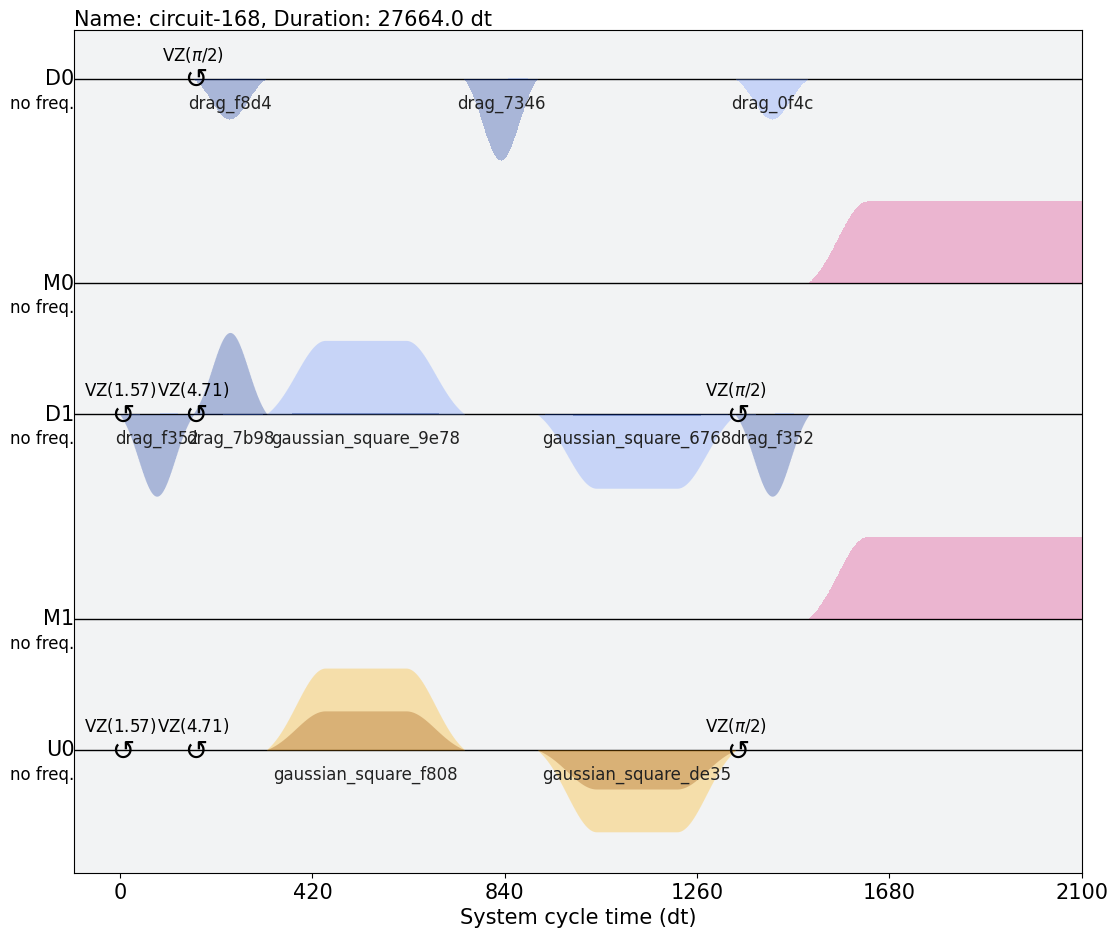

In [68]:
circuit_scheduler2 = schedule(transpiled_qc_2, backend_2)

circuit_scheduler2.draw(time_range=[0, 2000])

for short time interval gaussian pulse there is leakage outside of 0 1 space.
this DRAG pulse elimate it (Derivative Removal by Adiabatic Gate). by this we can reduec the duration of the gaussian pulse for single qubit pulses 

if the excitation state is in the equiator of the qsphere there is $\epsilon$ small error which is non distinguable so to overcome it we repeat it to make the error add up (Error Amplification) This is used during rabi oscialltion to caliibrate thus it adds up
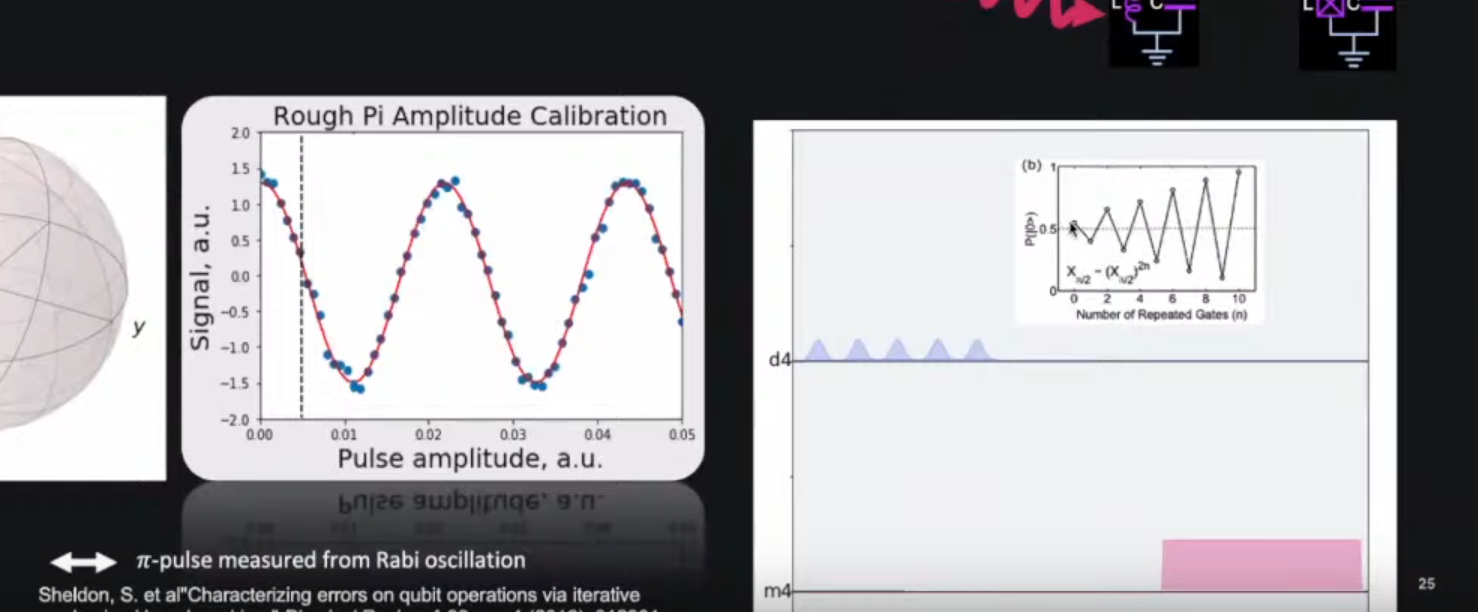

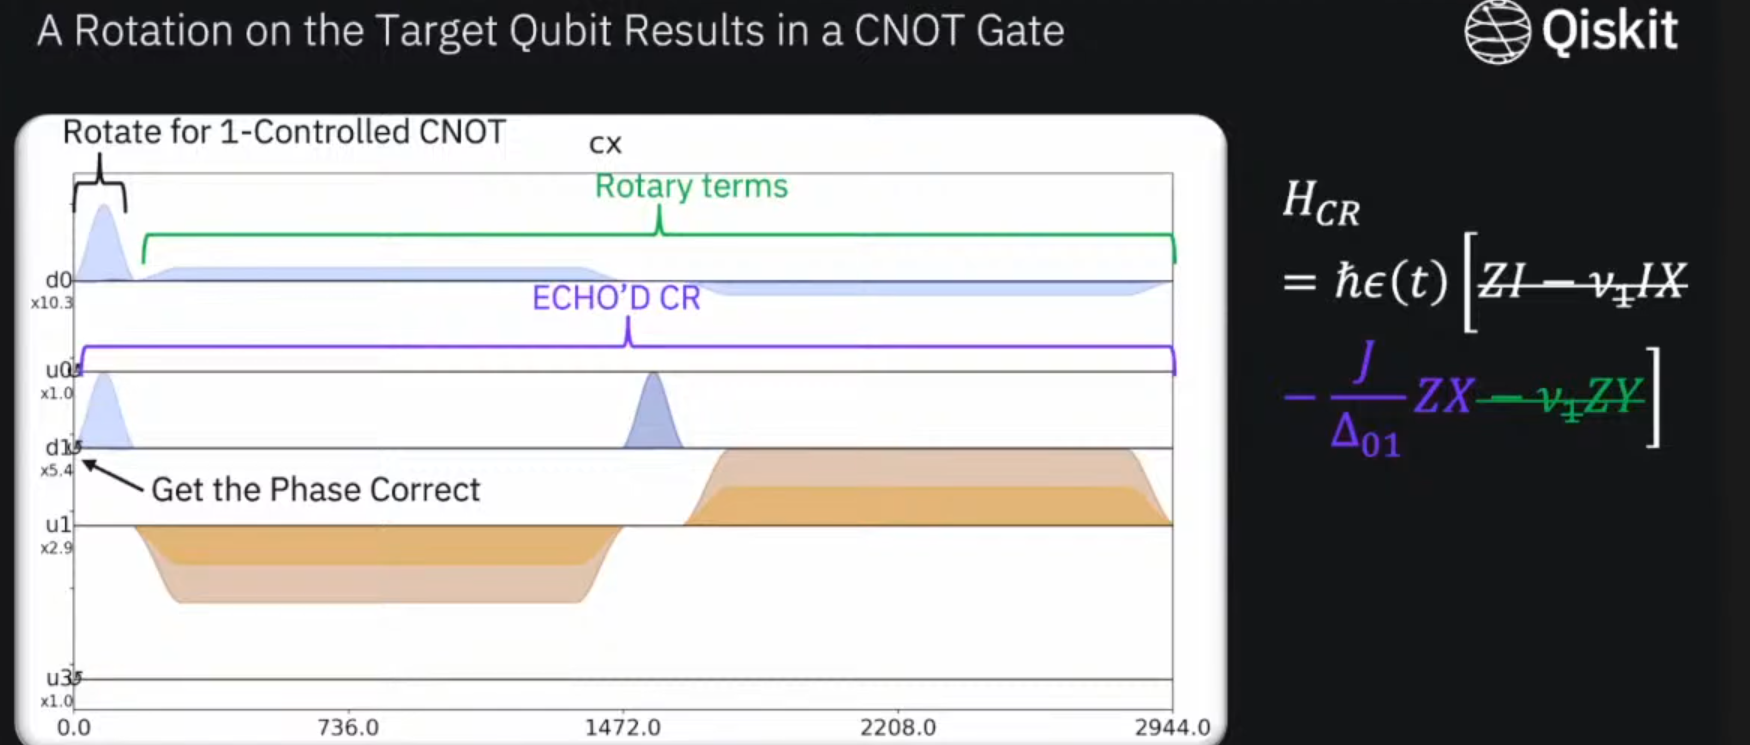

Intersting part of making the circuit design for specific hardware
> All of these is taken care by transpiler to perform min operation to map it to the hardware
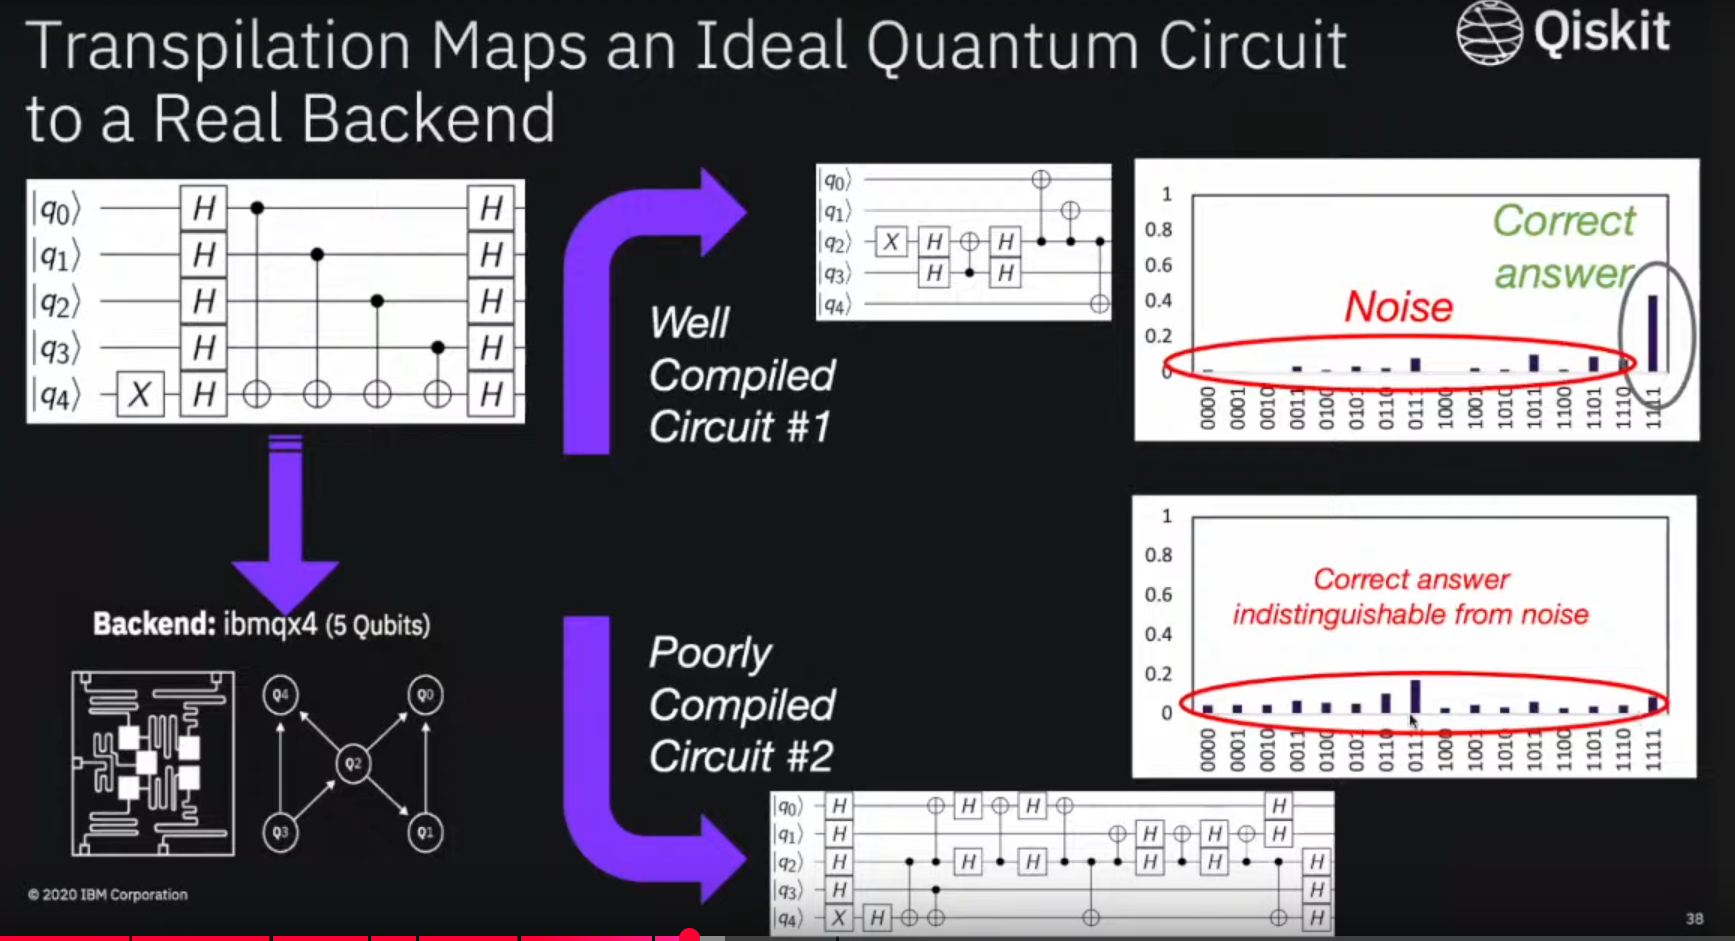
> all these take into account the idealized boxes and not take into account the unerlying pulses

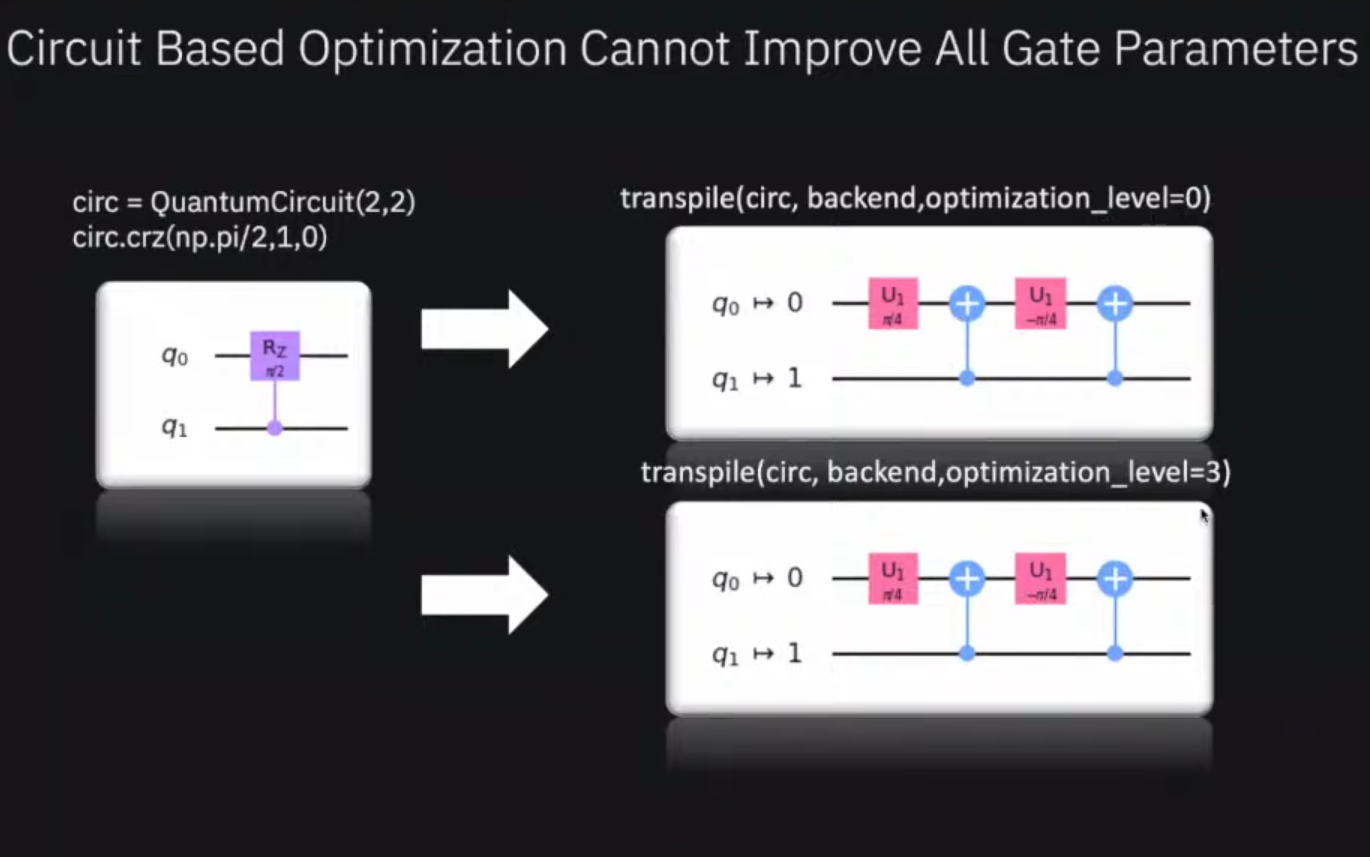

In [69]:
backend_2.defaults().qubit_freq_est

[4743892440.131271,
 4660914072.609433,
 4792493277.895261,
 4834410370.035304,
 4959527978.256725]

## Now we will use IBMQ


In [70]:
from dotenv import load_dotenv
import os
load_dotenv()  # take environment variables from .env.
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum", token=os.getenv('QISKIT_IBM_TOKEN'))



In [92]:
backends = service.backends(simulator=False)
for x in backends:
    print(f'name: {x.name}\nqubits: {x.configuration().n_qubits}')
    print("-"*20)

print(backends[0].properties().qubit_property(15))

name: ibm_brisbane
qubits: 127
--------------------
name: ibm_kyiv
qubits: 127
--------------------
name: ibm_sherbrooke
qubits: 127
--------------------
{'T1': (0.0003340313699801567, datetime.datetime(2025, 3, 2, 7, 4, 25, tzinfo=tzlocal())), 'T2': (4.446171503642105e-05, datetime.datetime(2025, 3, 2, 7, 5, 15, tzinfo=tzlocal())), 'frequency': (4947907109.315613, datetime.datetime(2025, 3, 2, 12, 18, 48, tzinfo=tzlocal())), 'anharmonicity': (-308052427.83201694, datetime.datetime(2025, 3, 2, 12, 18, 48, tzinfo=tzlocal())), 'readout_error': (0.011474609375, datetime.datetime(2025, 3, 2, 10, 27, 56, tzinfo=tzlocal())), 'prob_meas0_prep1': (0.005859375, datetime.datetime(2025, 3, 2, 10, 27, 46, tzinfo=tzlocal())), 'prob_meas1_prep0': (0.01708984375, datetime.datetime(2025, 3, 2, 10, 27, 51, tzinfo=tzlocal())), 'readout_length': (1.3e-06, datetime.datetime(2025, 3, 2, 10, 27, 56, tzinfo=tzlocal()))}


In [93]:
backend_ibm = service.least_busy(operational=True, simulator=False)

In [95]:
ib = service.backend(name='ibm_brisbane')

In [97]:
ib.name

'ibm_brisbane'

In [99]:
ib.__dict__

{'_options': Options(shots=4000, memory=False, meas_level=<MeasLevel.CLASSIFIED: 2>, meas_return=<MeasReturnType.AVERAGE: 'avg'>, memory_slots=None, memory_slot_size=100, rep_time=None, rep_delay=None, init_qubits=True, use_measure_esp=None, use_fractional_gates=False, noise_model=None, seed_simulator=None),
 '_provider': None,
 'name': 'ibm_brisbane',
 'description': None,
 'online_date': datetime.datetime(2023, 1, 23, 5, 0, tzinfo=tzutc()),
 'backend_version': '1.1.81',
 '_coupling_map': None,
 '_instance': 'ibm-q/open/main',
 '_service': <QiskitRuntimeService>,
 '_api_client': <qiskit_ibm_runtime.api.clients.runtime.RuntimeClient at 0x7f7d7d1123f0>,
 '_configuration': <qiskit_ibm_runtime.models.backend_configuration.PulseBackendConfiguration at 0x7f7d7d0c3890>,
 '_properties': <qiskit_ibm_runtime.models.backend_properties.BackendProperties at 0x7f7d6f54d4f0>,
 '_defaults': <qiskit_ibm_runtime.models.pulse_defaults.PulseDefaults at 0x7f7d6f276df0>,
 '_target': <qiskit.transpiler.targ

In [108]:
print(ib.qubit_properties([0]))

print(ib.online_date)
print(ib.configuration().__dict__)

[QubitProperties(t1=0.00023736364020705798, t2=6.690793639551407e-05, frequency=4721905257.319034)]
2023-01-23 05:00:00+00:00
{'n_uchannels': 288, 'u_channel_lo': [[UchannelLO(1, (1+0j))], [UchannelLO(14, (1+0j))], [UchannelLO(0, (1+0j))], [UchannelLO(2, (1+0j))], [UchannelLO(1, (1+0j))], [UchannelLO(3, (1+0j))], [UchannelLO(2, (1+0j))], [UchannelLO(4, (1+0j))], [UchannelLO(3, (1+0j))], [UchannelLO(5, (1+0j))], [UchannelLO(15, (1+0j))], [UchannelLO(4, (1+0j))], [UchannelLO(6, (1+0j))], [UchannelLO(5, (1+0j))], [UchannelLO(7, (1+0j))], [UchannelLO(6, (1+0j))], [UchannelLO(8, (1+0j))], [UchannelLO(7, (1+0j))], [UchannelLO(9, (1+0j))], [UchannelLO(16, (1+0j))], [UchannelLO(8, (1+0j))], [UchannelLO(10, (1+0j))], [UchannelLO(9, (1+0j))], [UchannelLO(11, (1+0j))], [UchannelLO(10, (1+0j))], [UchannelLO(12, (1+0j))], [UchannelLO(11, (1+0j))], [UchannelLO(13, (1+0j))], [UchannelLO(17, (1+0j))], [UchannelLO(12, (1+0j))], [UchannelLO(0, (1+0j))], [UchannelLO(18, (1+0j))], [UchannelLO(4, (1+0j))],

In [132]:
print(ib.configuration().supported_instructions)
print(ib.configuration().processor_type)
print(ib.configuration().parametric_pulses)
print(ib.properties().readout_error(0))
print(ib.properties().frequency(0))
print(ib.properties().__class__)
print(ib.options.__dict__)
instruction = set()
for i in ib.instructions:
    (v1, v2) = i
    instruction.add("inst:<{}> unit:<{}>".format(v1.name, v1.unit or ""))
    # print(v1.name, v1.unit, v2)

print(instruction)

['ecr', 'id', 'delay', 'measure', 'reset', 'rz', 'sx', 'x', 'if_else', 'for_loop', 'switch_case']
{'family': 'Eagle', 'revision': 3}
['gaussian', 'gaussian_square', 'gaussian_square_drag', 'drag', 'constant']
0.028564453125
4721905257.319034
<class 'qiskit_ibm_runtime.models.backend_properties.BackendProperties'>
{'shots': 4000, 'memory': False, 'meas_level': <MeasLevel.CLASSIFIED: 2>, 'meas_return': <MeasReturnType.AVERAGE: 'avg'>, 'memory_slots': None, 'memory_slot_size': 100, 'rep_time': None, 'rep_delay': None, 'init_qubits': True, 'use_measure_esp': None, 'use_fractional_gates': False, 'noise_model': None, 'seed_simulator': None}
{'inst:<ecr> unit:<dt>', 'inst:<reset> unit:<dt>', 'inst:<delay> unit:<dt>', 'inst:<measure> unit:<dt>', 'inst:<rz> unit:<dt>', 'inst:<<property object at 0x7f7db592b0b0>> unit:<<property object at 0x7f7db592ade0>>', 'inst:<id> unit:<dt>', 'inst:<x> unit:<dt>', 'inst:<sx> unit:<dt>'}


/tmp/ipykernel_19600/3303185469.py:11: DeprecationWarning: The property ``qiskit.circuit.instruction.Instruction.unit`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  instruction.add("inst:<{}> unit:<{}>".format(v1.name, v1.unit or ""))


In [138]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure_all()

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(backend=backend_ibm, optimization_level=1)
isa_circuit = pm.run(qc)

from qiskit_ibm_runtime import Sampler
sampler = Sampler(mode=backend_ibm)
sampler.options.default_shots = 1024  # Options can be set using auto-complete.
job = sampler.run([isa_circuit])

In [139]:
job.job_id()

'cz21620h0kc00088fnbg'

In [143]:
job.status()

'DONE'

In [147]:
job.result()

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=1>), meas=BitArray(<shape=(), num_shots=1024, num_bits=1>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-03-02 08:13:01', stop='2025-03-02 08:13:08', size=1024>)])}, 'version': 2})

In [148]:
job.backend()

<IBMBackend('ibm_kyiv')>